以下将会用一个非常简单的例子来展示关于loss和gradient descent的内容

测试日摄入 (kcal): [500 800 700 300]
预测当天热量盈余 (kcal): -2.385147242504343e+35


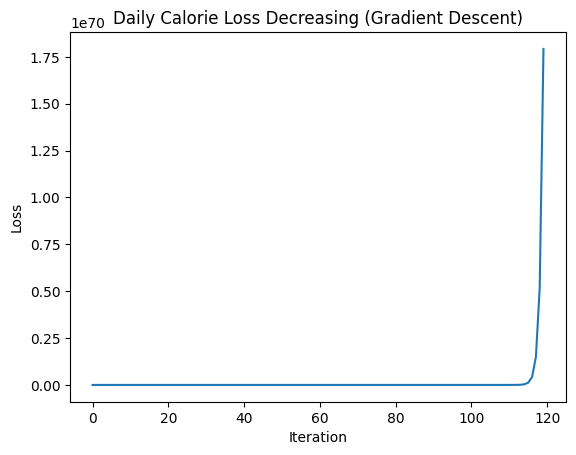

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. 问题设定：一天的热量计算
# 输入：早饭、午饭、晚饭、其他摄入（kcal）
# 输出：当天热量盈余 = 总摄入 - 身体消耗
# =====================================

np.random.seed(42)

# 模拟 100 天的饮食数据
# 每一行： [早饭, 午饭, 晚饭, 其他]
X = np.random.randint(300, 900, size=(100, 4))

# 身体每日固定消耗（kcal）
daily_consumption = 2000

# 真实世界规律（我们假设的“真相”）
true_weights = np.array([1.0, 1.0, 1.0, 1.0])
y = X @ true_weights - daily_consumption  # 当天热量盈余

# =====================================
# 2. 模型定义（需要学习的部分）
# y_hat = w1*早饭 + w2*午饭 + w3*晚饭 + w4*其他 - c
# =====================================

w = np.random.randn(4)   # 四个摄入的权重
c = 0.0                  # 身体消耗（模型不知道，靠学习）
lr = 1e-6
steps = 120

losses = []

# =====================================
# 3. 梯度下降训练
# =====================================

for _ in range(steps):
    y_pred = X @ w - c

    # 均方误差 Loss
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)

    # 梯度计算
    dw = 2 * np.mean((y_pred - y).reshape(-1, 1) * X, axis=0)
    dc = -2 * np.mean(y_pred - y)

    # 参数更新
    w -= lr * dw
    c -= lr * dc

# =====================================
# 4. 用训练好的模型计算一天热量
# =====================================

test_day = np.array([500, 800, 700, 300])  # 早、午、晚、其他
predicted_calorie_balance = test_day @ w - c

print("测试日摄入 (kcal):", test_day)
print("预测当天热量盈余 (kcal):", round(predicted_calorie_balance, 2))

# =====================================
# 5. 可视化：Loss 下降过程
# =====================================

plt.figure()
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Daily Calorie Loss Decreasing (Gradient Descent)")
plt.show()


当我们引入更复杂的层数以及把ReLU作为激活函数

Step 0, Loss: 244094.1845
Step 100, Loss: 239042.4351
Step 200, Loss: 233904.8491
Step 300, Loss: 228968.7305
Step 400, Loss: 224226.1788
Step 500, Loss: 219669.6035
Step 600, Loss: 215291.7115
Step 700, Loss: 211085.4960
Step 800, Loss: 207044.2247
Step 900, Loss: 203161.4295
Step 1000, Loss: 199430.8958
Step 1100, Loss: 195846.6527
Step 1200, Loss: 192402.9636
Step 1300, Loss: 189094.3167
Step 1400, Loss: 185915.4164
Step 1500, Loss: 182861.1748
Step 1600, Loss: 179926.7035
Step 1700, Loss: 177107.3057
Step 1800, Loss: 174398.4689
Step 1900, Loss: 171795.8575
Step 2000, Loss: 169295.3060
Step 2100, Loss: 166892.8121
Step 2200, Loss: 164584.5306
Step 2300, Loss: 162366.7670
Step 2400, Loss: 160235.9717
Step 2500, Loss: 158188.7342
Step 2600, Loss: 156221.7780
Step 2700, Loss: 154331.9547
Step 2800, Loss: 152516.2397
Step 2900, Loss: 150771.7270
Step 3000, Loss: 149095.6242
Step 3100, Loss: 147485.2488
Step 3200, Loss: 145938.0234
Step 3300, Loss: 144451.4714
Step 3400, Loss: 143023.21

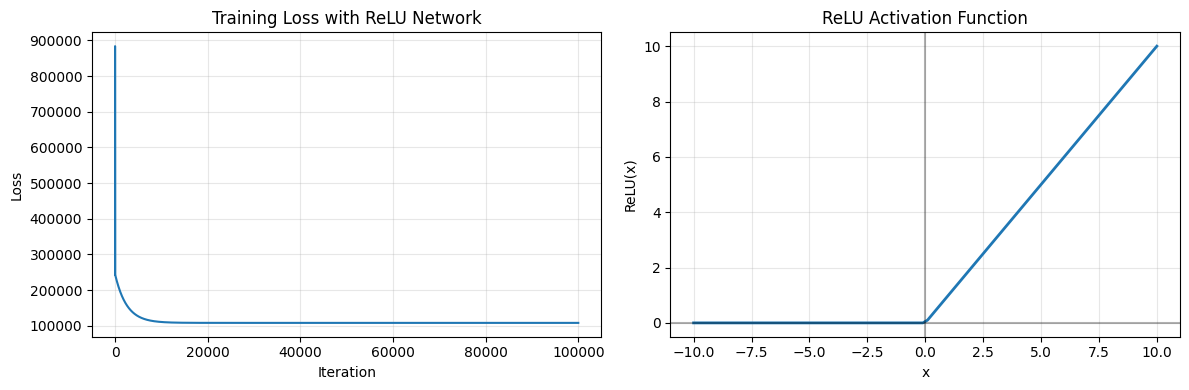


模型参数信息:
W1 shape: (4, 4), W2 shape: (4, 1)
隐藏层使用了ReLU激活函数


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. 问题设定：一天的热量计算
# =====================================

np.random.seed(42)

# 模拟 100 天的饮食数据
X = np.random.randint(300, 900, size=(100, 4))
daily_consumption = 2000
true_weights = np.array([1.0, 1.0, 1.0, 1.0])
y = X @ true_weights - daily_consumption

# =====================================
# 2. 神经网络模型定义（带ReLU激活函数）
# 结构：输入层(4) → 隐藏层(4) → 输出层(1)
# =====================================

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 初始化参数
W1 = np.random.randn(4, 4) * 0.01  # 第一层权重
b1 = np.zeros(4)                    # 第一层偏置
W2 = np.random.randn(4, 1) * 0.01  # 第二层权重
b2 = np.zeros(1)                    # 第二层偏置

lr = 1e-4
steps = 100000

losses = []

# =====================================
# 3. 梯度下降训练
# =====================================

for step in range(steps):
    # 前向传播
    z1 = X @ W1 + b1           # 线性变换
    a1 = relu(z1)              # ReLU激活
    y_pred = a1 @ W2 + b2      # 输出层
    
    # 计算损失（均方误差）
    loss = np.mean((y_pred.squeeze() - y) ** 2)
    losses.append(loss)
    
    # 反向传播
    m = X.shape[0]
    
    # 输出层梯度
    dy = 2 * (y_pred.squeeze() - y) / m  # dL/dy_pred
    dW2 = a1.T @ dy.reshape(-1, 1)       # 梯度：W2
    db2 = np.sum(dy)                     # 梯度：b2
    
    # 隐藏层梯度
    da1 = dy.reshape(-1, 1) @ W2.T      # 经过W2的梯度
    dz1 = da1 * relu_derivative(z1)     # ReLU的梯度
    dW1 = X.T @ dz1                      # 梯度：W1
    db1 = np.sum(dz1, axis=0)           # 梯度：b1
    
    # 参数更新
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    
    # 每100步打印损失
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss:.4f}")

# =====================================
# 4. 用训练好的模型预测
# =====================================

test_day = np.array([[500, 800, 700, 300]])
z1_test = test_day @ W1 + b1
a1_test = relu(z1_test)
predicted = a1_test @ W2 + b2

print("\n" + "="*50)
print("测试日摄入 (kcal):", test_day[0])
print("预测当天热量盈余 (kcal):", round(predicted[0, 0], 2))
print("真实计算公式:", test_day @ true_weights - daily_consumption)
print("="*50)

# =====================================
# 5. 可视化
# =====================================

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 损失曲线
axes[0].plot(losses)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training Loss with ReLU Network")
axes[0].grid(True, alpha=0.3)

# ReLU激活函数可视化
x_relu = np.linspace(-10, 10, 100)
axes[1].plot(x_relu, relu(x_relu), linewidth=2)
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_xlabel("x")
axes[1].set_ylabel("ReLU(x)")
axes[1].set_title("ReLU Activation Function")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印模型参数信息
print("\n模型参数信息:")
print(f"W1 shape: {W1.shape}, W2 shape: {W2.shape}")
print(f"隐藏层使用了ReLU激活函数")